# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

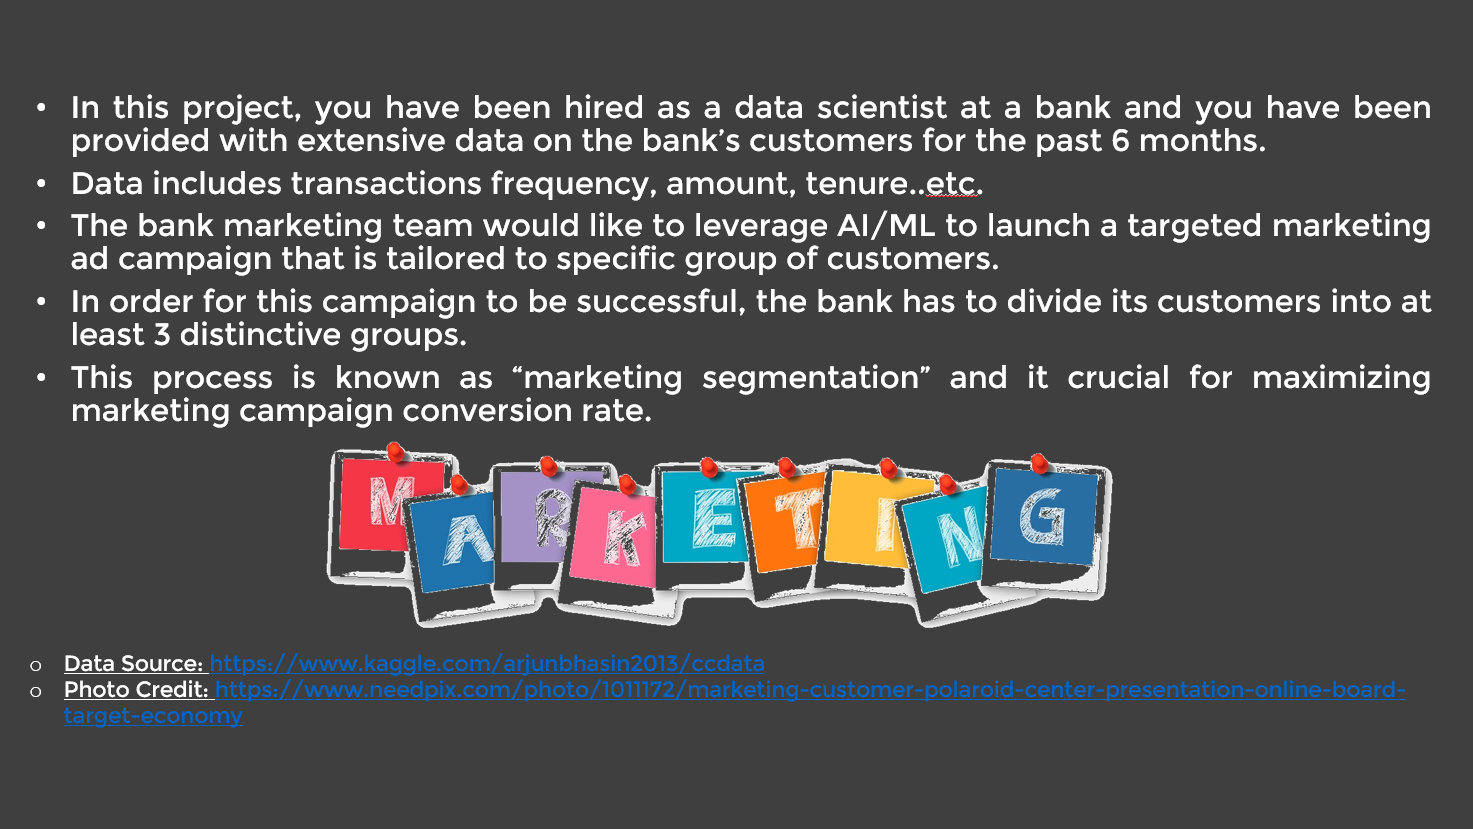

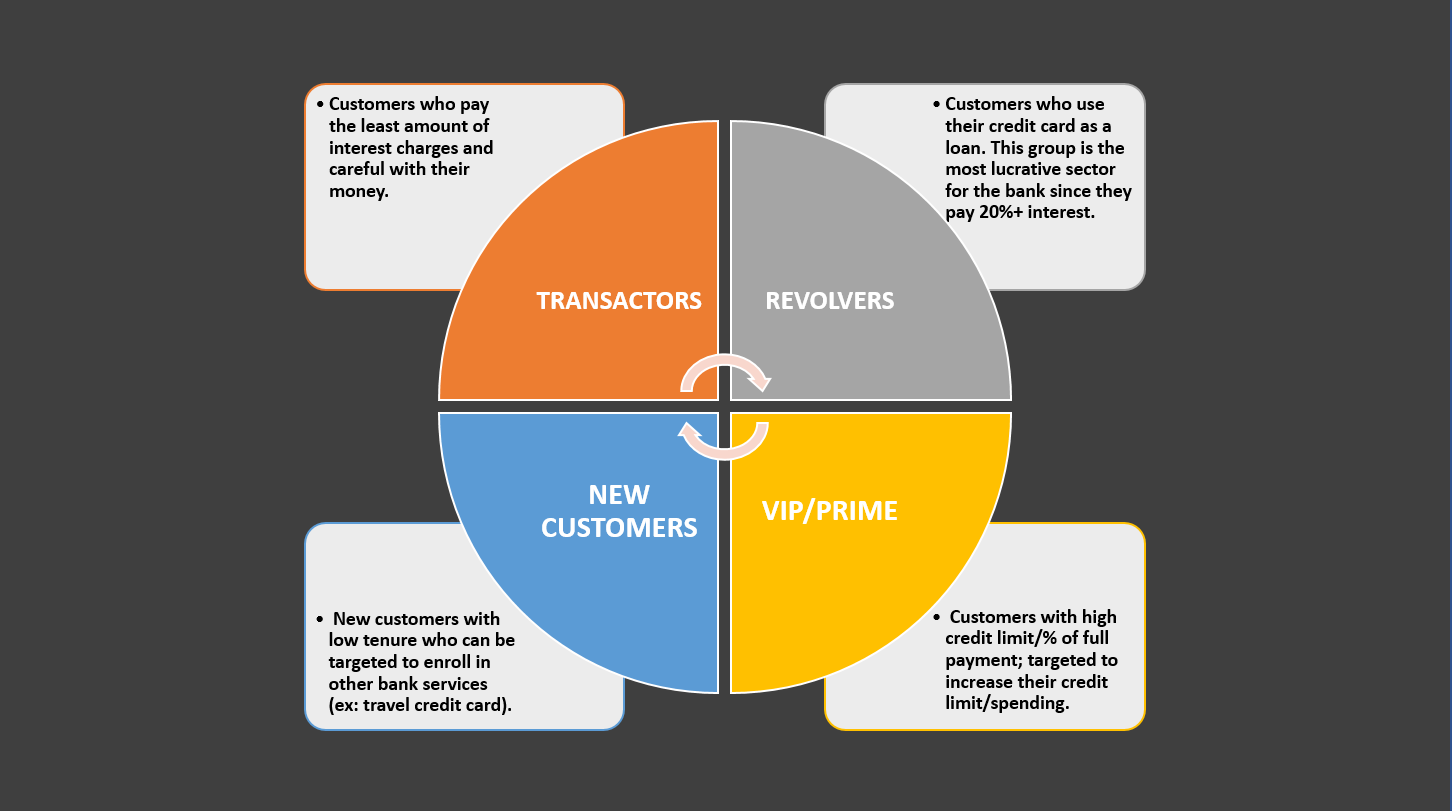

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [2]:
!pip install jupyterthemes

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly


In [4]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('Marketing_data.csv')

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [5]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
# Let's apply info and get additional insights on our dataframe
# 18 features with 8950 points  
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
creditcard_df.BALANCE.describe()

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

In [8]:
# Let's apply describe() and get more statistical insights on our dataframe
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- Obtain the features (row) of the customer who made the maximim "ONEOFF_PURCHASES"
- Obtain the features of the customer who made the maximum cash advance transaction? how many cash advance transactions did that customer make? how often did he/she pay their bill?

In [9]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [10]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [11]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


# TASK #3: VISUALIZE AND EXPLORE DATASET

<AxesSubplot:>

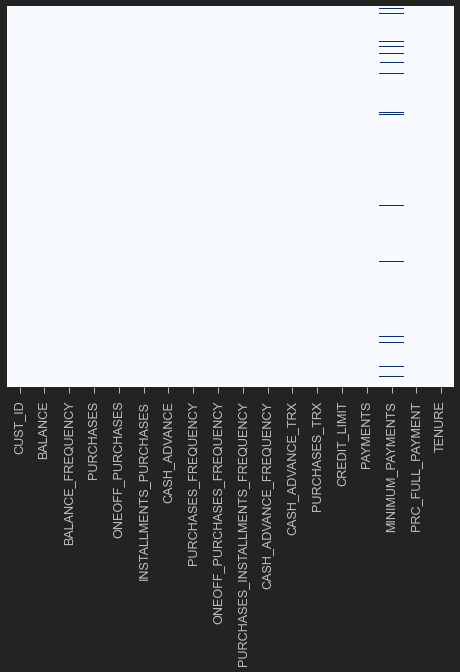

In [12]:
# Let's see if we have any missing data, luckily we don't have many!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [13]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


 - Fill out missing elements in the "CREDIT_LIMIT" column
 - Double check and make sure that no missing elements are present

In [15]:
creditcard_df.loc[(creditcard_df["CREDIT_LIMIT" ].isnull() == True), "CREDIT_LIMIT" ] = creditcard_df["CREDIT_LIMIT" ].mean()


In [16]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [17]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0


- Drop Customer ID column 'CUST_ID' and make sure that the column has been removed from the dataframe

In [18]:
creditcard_df.drop('CUST_ID',axis = 1, inplace = True)

In [19]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [20]:
n = len(creditcard_df.columns)
n

17

In [21]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\goura\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\goura\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\goura\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

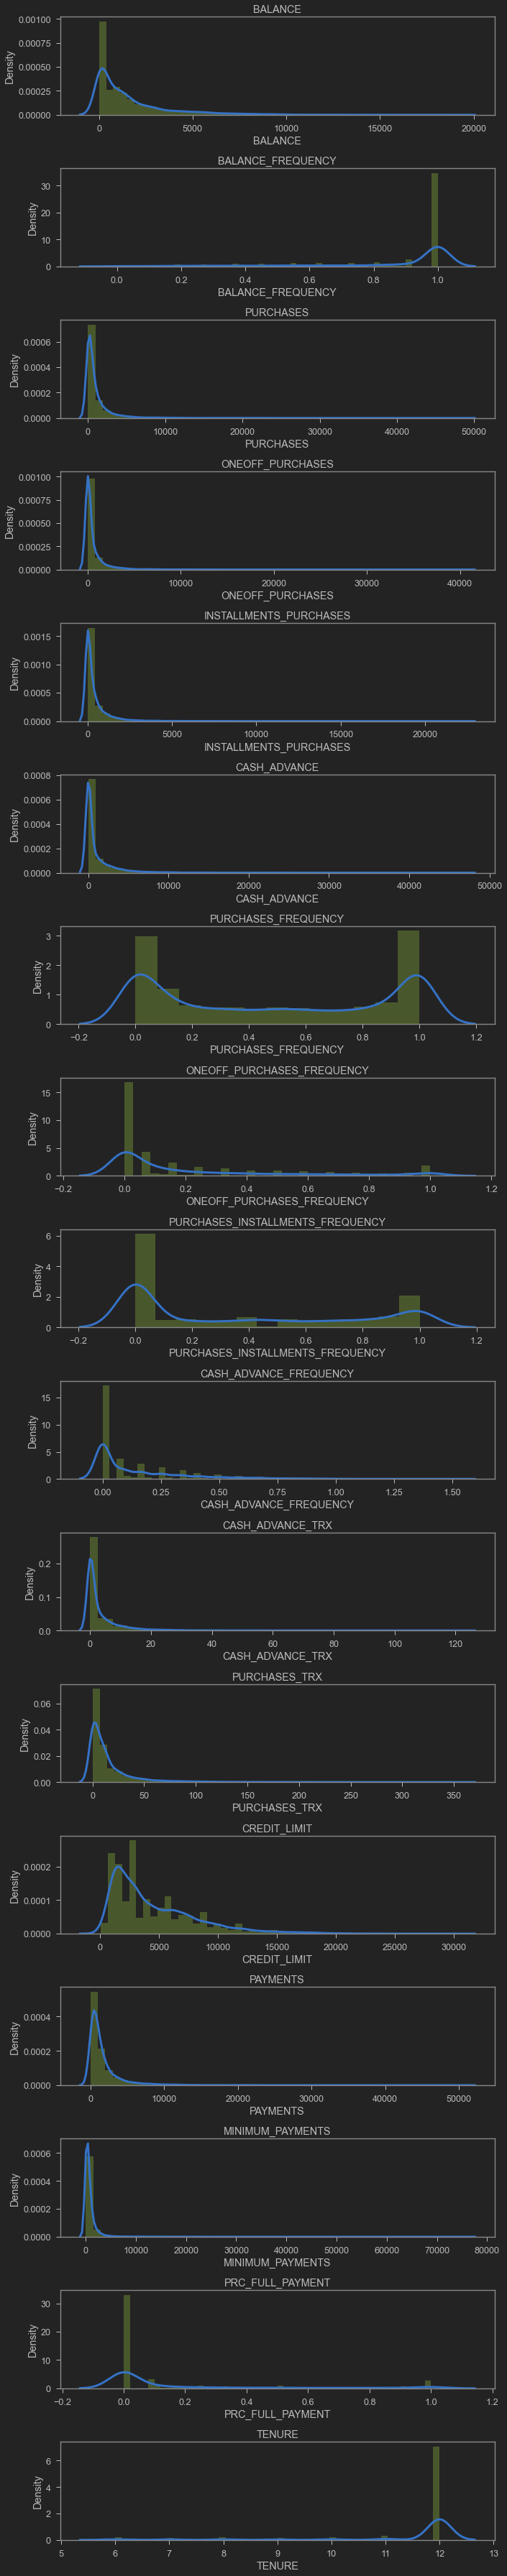

In [22]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

- Obtain the correlation matrix between features

In [23]:
corr = creditcard_df.corr()

<AxesSubplot:>

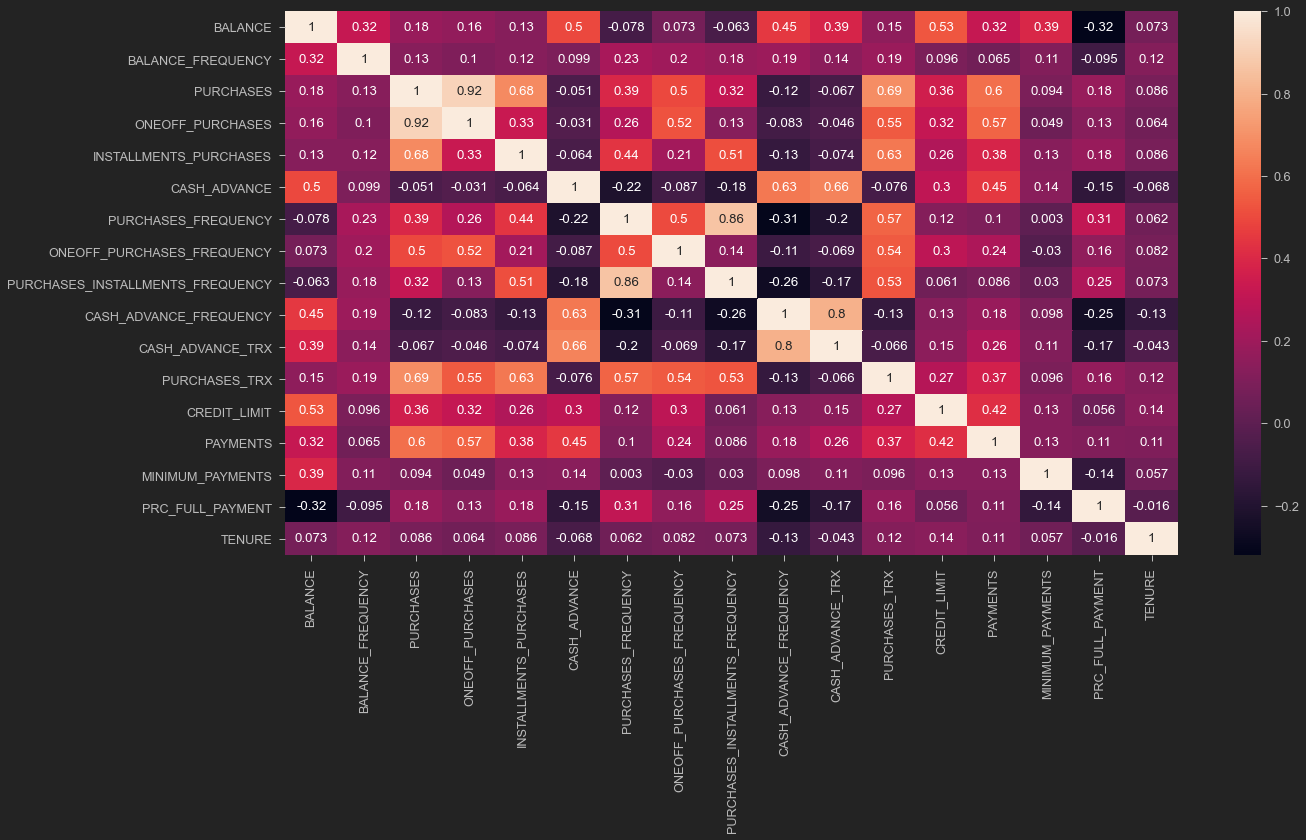

In [24]:
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(corr, annot = True)

# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

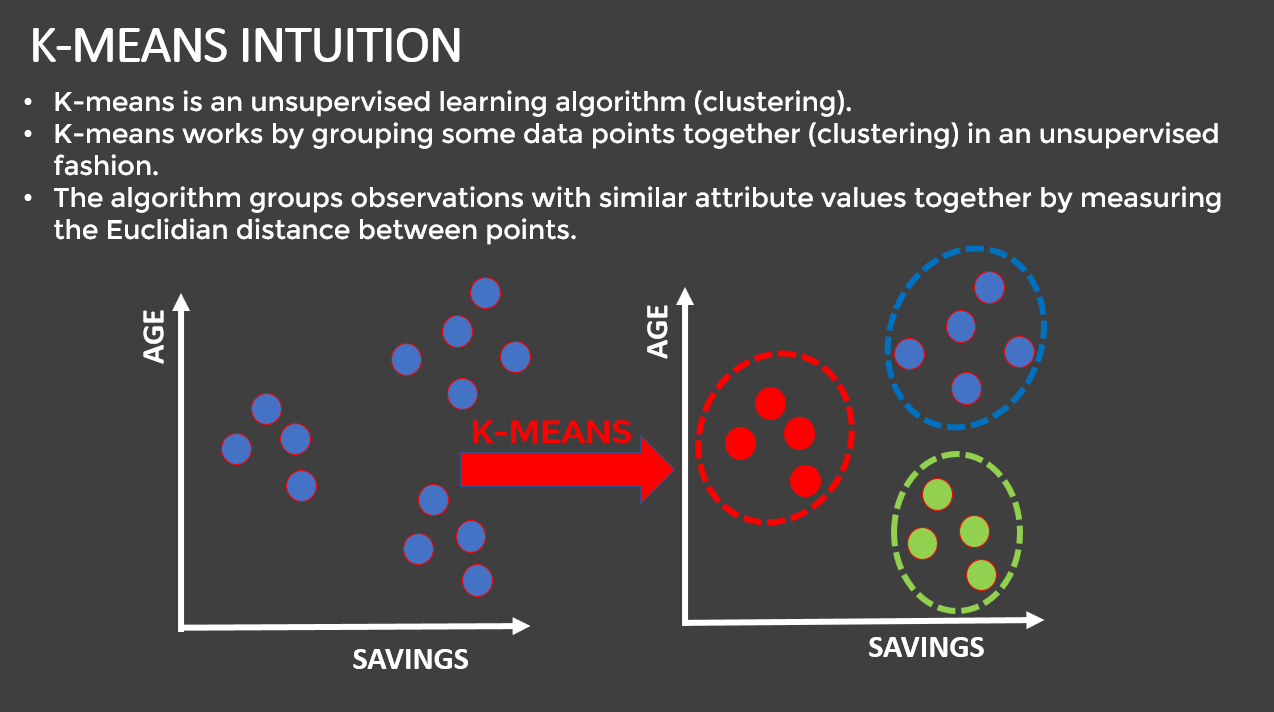

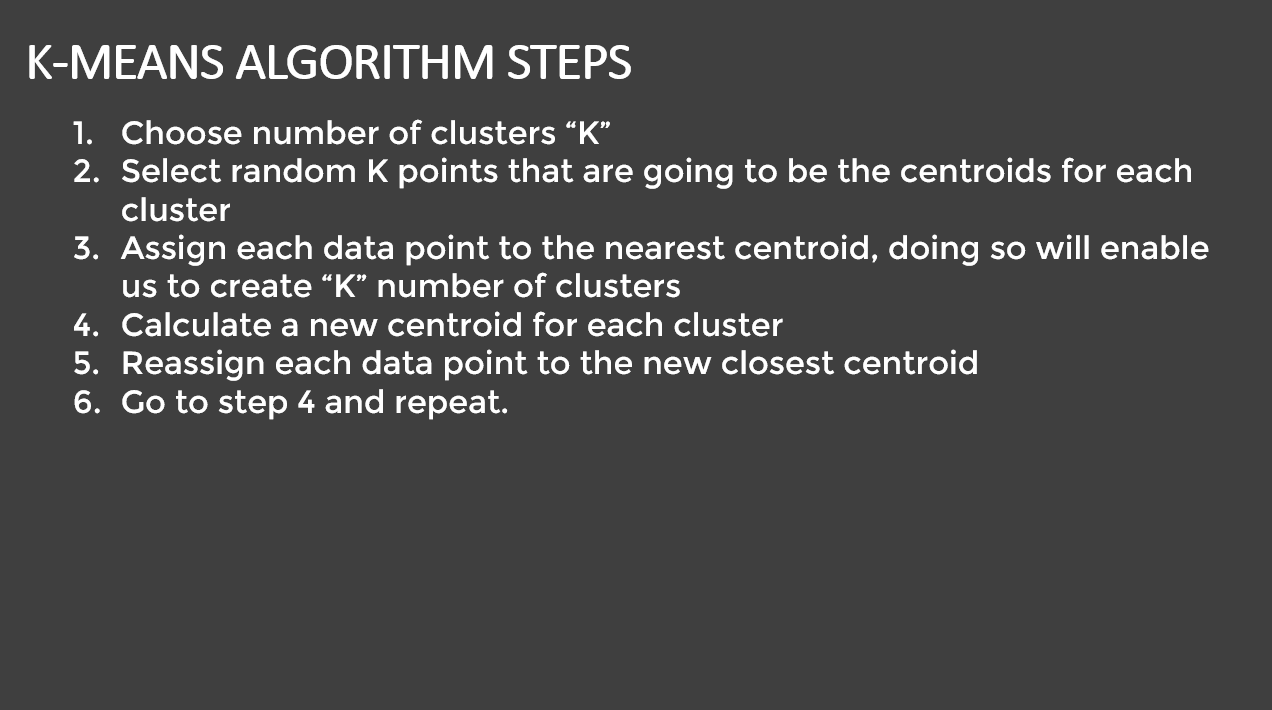

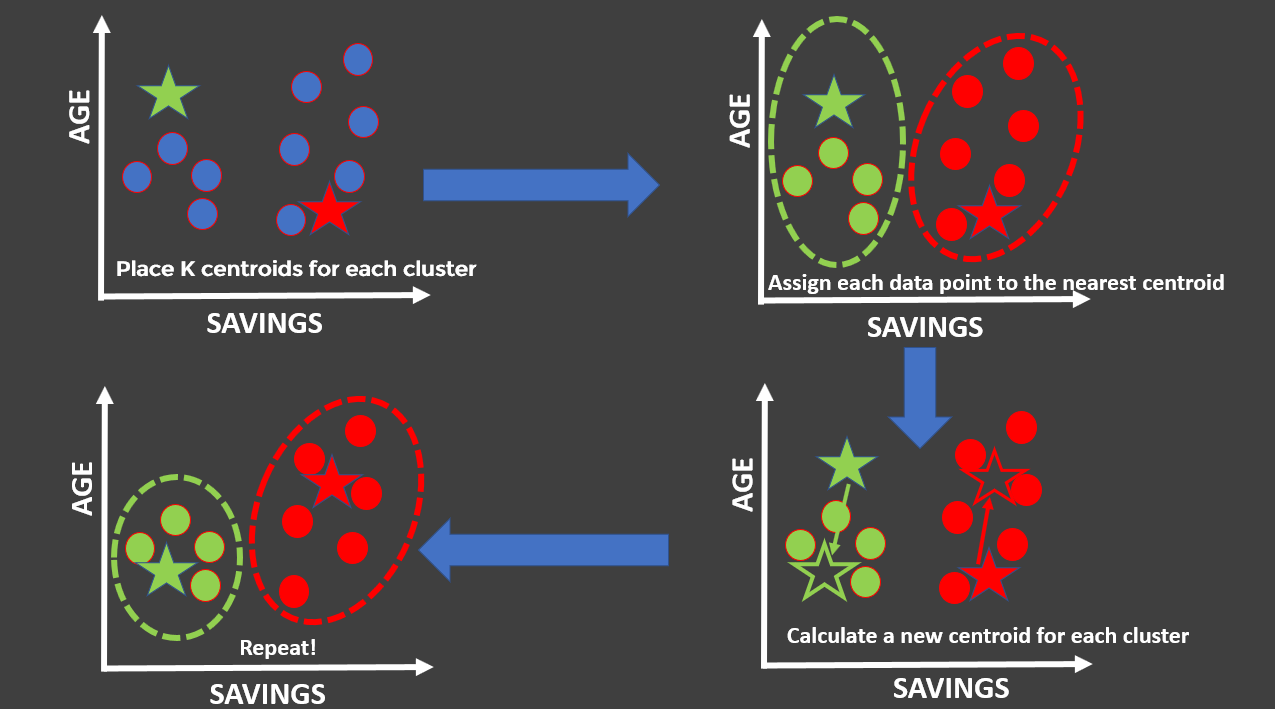

# TASK #5: LEARN HOW TO OBTAIN THE OPTIMAL NUMBER OF CLUSTERS (ELBOW METHOD)

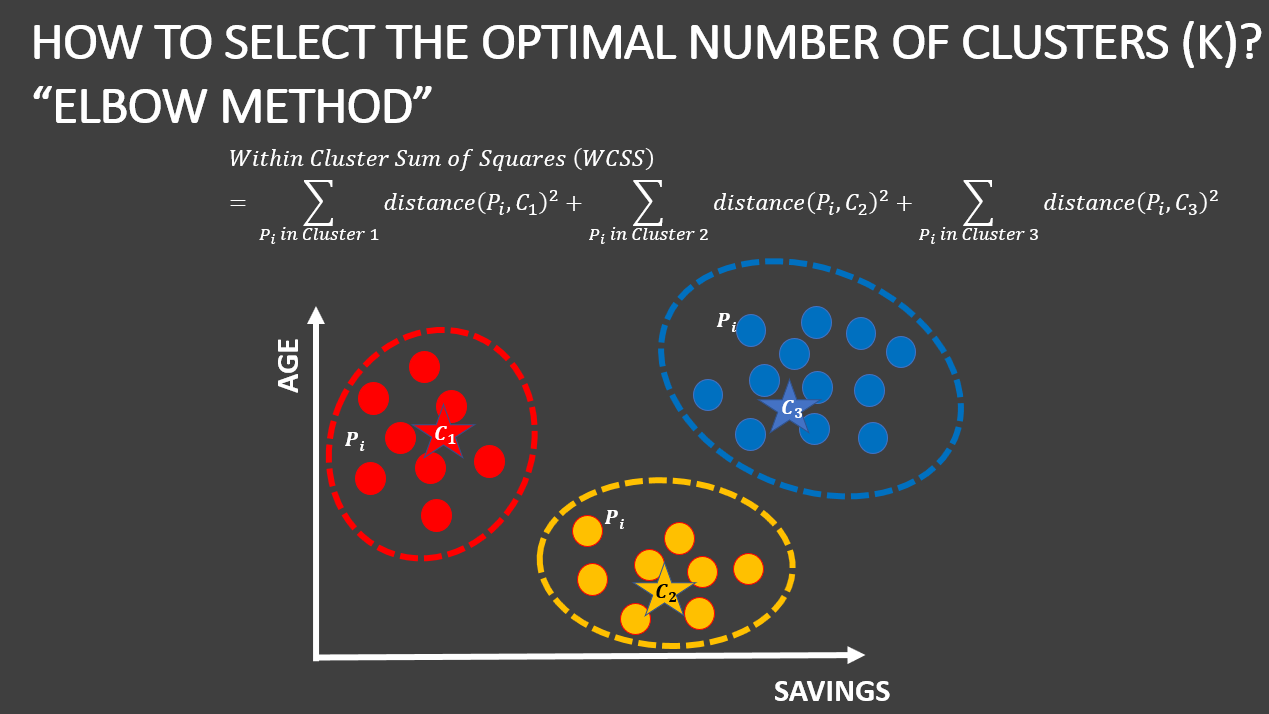

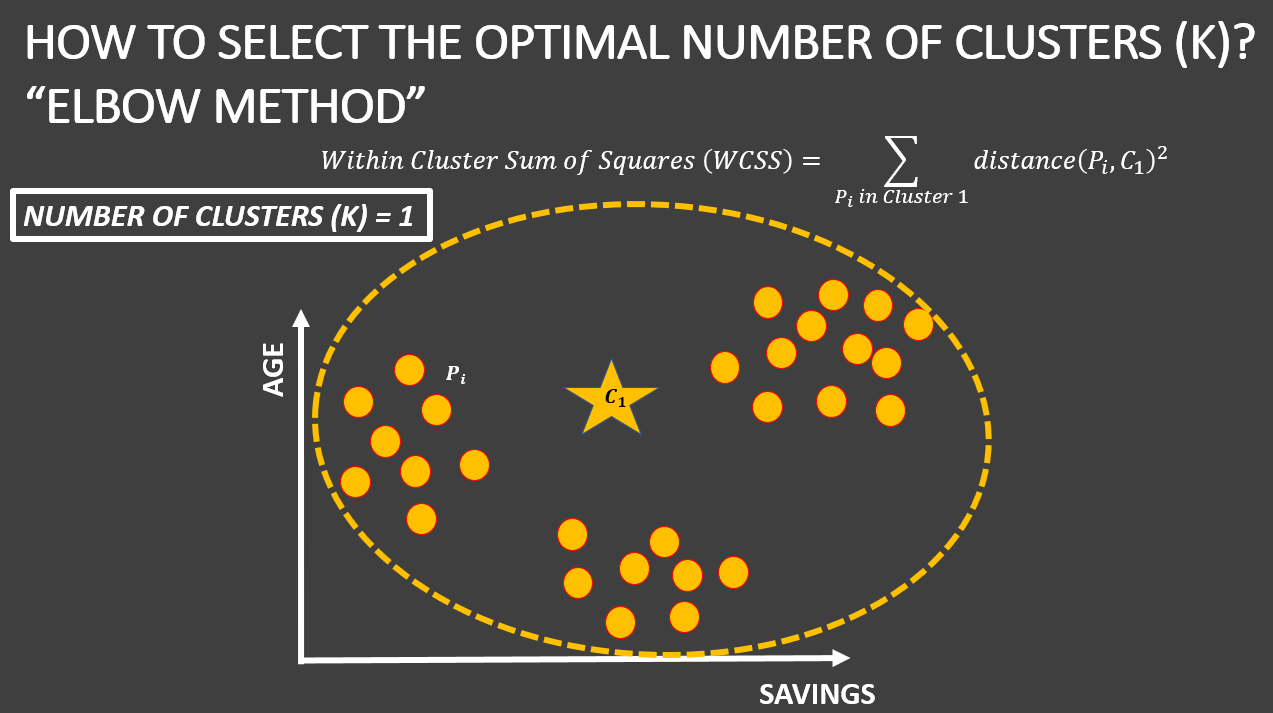

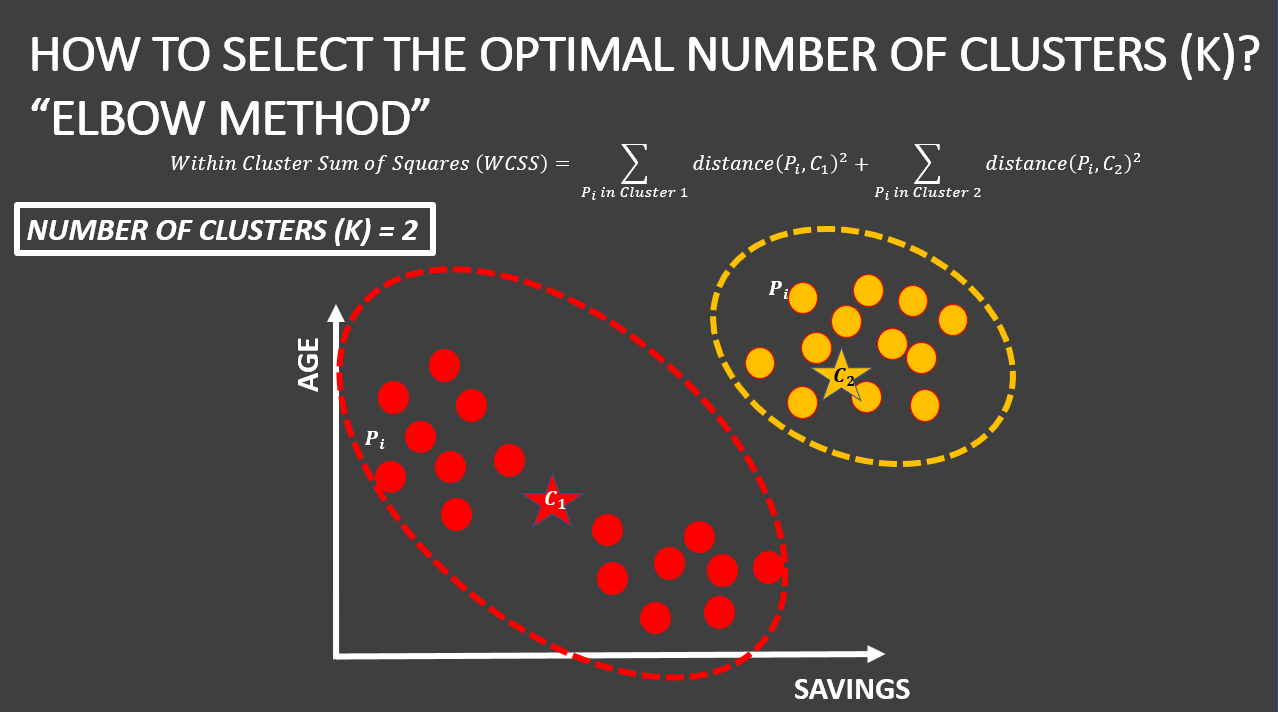

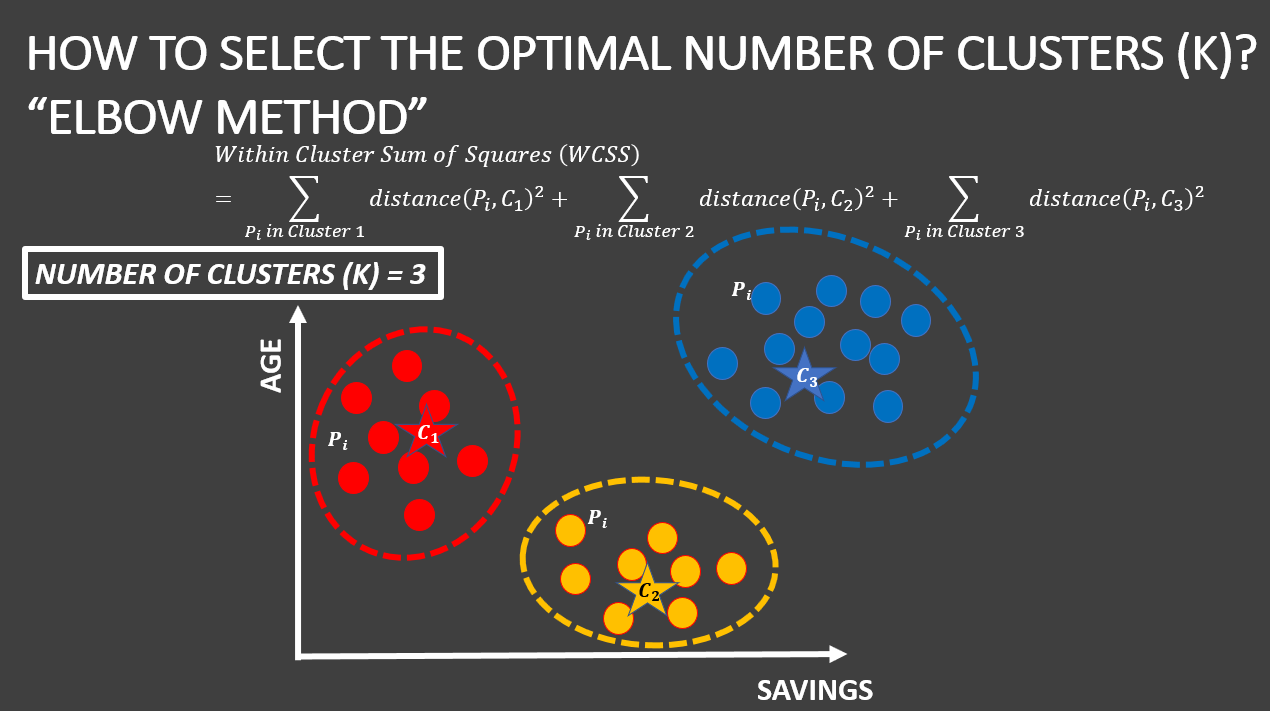

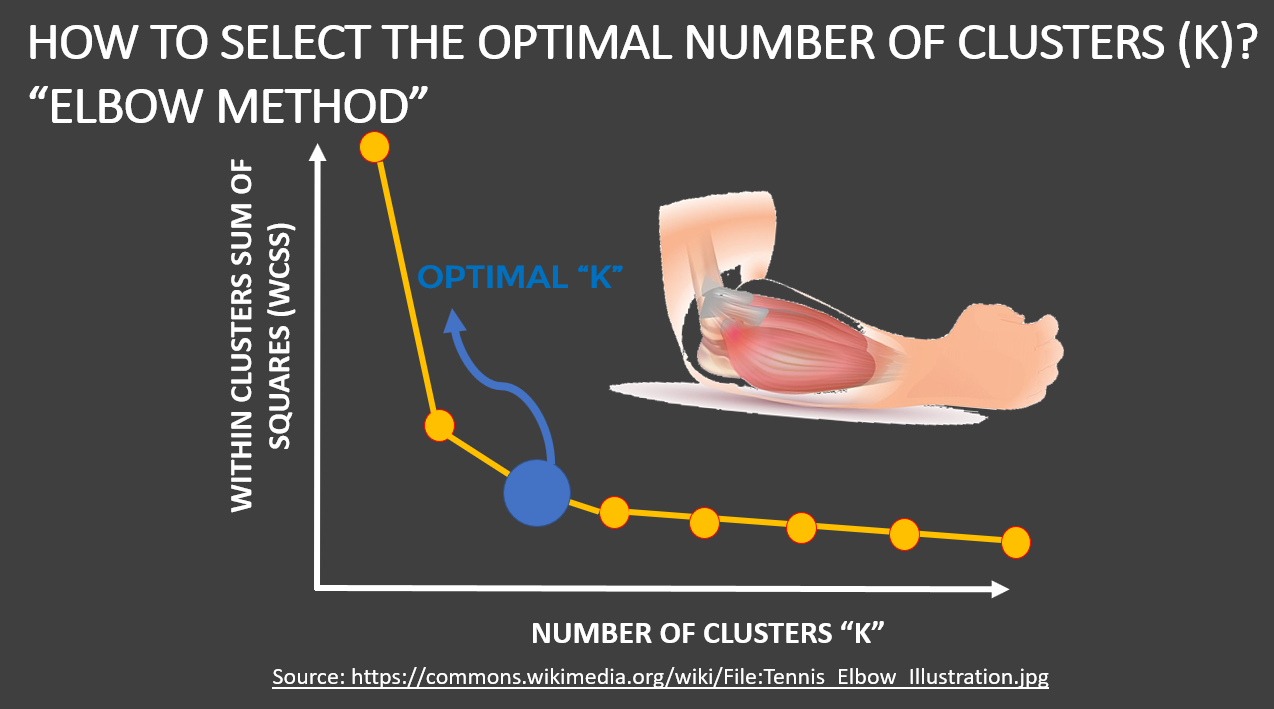

# TASK #6: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [25]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [26]:
creditcard_df_scaled.shape

(8950, 17)

In [27]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

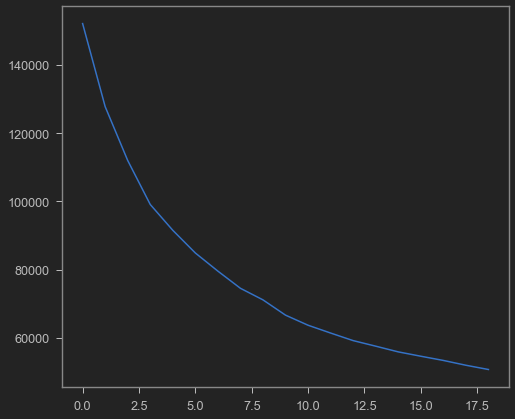

In [28]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')
scores_1 = []
range_values = range(1, 20)
for k in range_values:
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1, 'bx-')
    


# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7 or 8.

Let's assume that our data only consists of the first 7 columns of "creditcard_df_scaled", what is the optimal number of clusters would be in this case? modify the code and rerun the cells. 

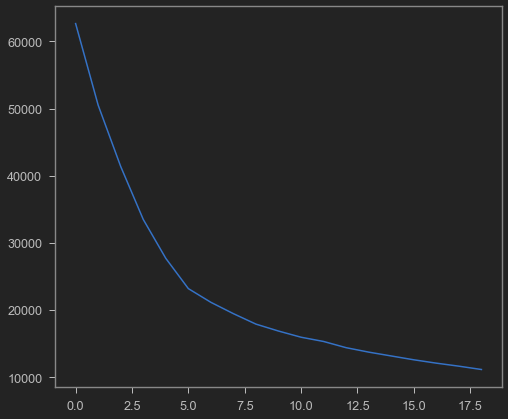

In [29]:
scores_1 = []
range_values = range(1, 20)
for k in range_values:
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(creditcard_df_scaled[:,:7 ])
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1, 'bx-')
    

# TASK #7: APPLY K-MEANS METHOD

In [30]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [31]:
kmeans.cluster_centers_.shape

(7, 17)

In [32]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.341141,-0.333100,-0.280989,-0.207459,-0.282905,0.060232,-0.171997,-0.271368,-0.207953,0.291927,-0.007982,-0.379541,-0.560480,-0.389957,-0.207857,0.021533,-3.178761
1,-0.336771,0.357265,0.043972,-0.075442,0.242271,-0.367511,0.980850,0.224499,0.892231,-0.470156,-0.358992,0.240945,-0.131386,-0.171151,-0.085114,0.341849,0.271866
2,-0.701724,-2.133645,-0.306818,-0.232352,-0.298486,-0.324268,-0.534451,-0.438620,-0.422745,-0.523387,-0.377769,-0.414175,-0.176142,-0.201704,-0.257647,0.284598,0.200645
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
4,1.670263,0.394566,-0.212797,-0.149894,-0.227844,1.995164,-0.451220,-0.174448,-0.409688,1.908751,1.918562,-0.253617,1.014396,0.814855,0.561685,-0.392188,0.072566
5,0.571440,0.459102,1.848892,1.582327,1.464615,-0.238672,1.152152,1.787270,0.980728,-0.349101,-0.259724,2.166304,1.134634,1.001660,0.226514,0.440622,0.311084
6,0.018310,0.404015,-0.348826,-0.229680,-0.402601,-0.096005,-0.836638,-0.367971,-0.760744,0.098480,-0.032419,-0.473783,-0.298553,-0.246318,-0.004152,-0.455504,0.272863


In [33]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,854.418008,0.798362,402.868166,248.098605,155.239781,1105.181375,0.421320,0.121503,0.281791,0.193562,3.194357,5.275862,2455.195062,604.255929,379.804248,0.160013,7.263323
1,863.514216,0.961903,1097.151101,467.218797,630.150385,208.182609,0.884013,0.269430,0.719033,0.041061,0.798973,20.698826,4016.415068,1237.677517,665.851288,0.253700,11.881145
2,103.895679,0.371830,347.683000,206.780042,141.150292,298.865386,0.275849,0.071609,0.196428,0.030409,0.670833,4.415000,3853.574537,1149.229975,263.770653,0.236955,11.785833
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,5040.986800,0.970740,548.560575,343.643811,205.031387,5162.822612,0.309254,0.150417,0.201617,0.517105,16.341601,8.405862,8185.236241,4092.068945,2173.188983,0.039006,11.614431
5,2753.877914,0.986028,4953.391342,3218.775708,1735.500590,478.363785,0.952765,0.735635,0.754204,0.065286,1.476401,68.556047,8622.713864,4632.850295,1392.087234,0.282589,11.933628
6,1602.586051,0.972978,257.932698,211.216342,47.000724,777.544551,0.154567,0.092685,0.062098,0.154851,3.027589,2.933357,3408.193001,1020.076380,854.529736,0.020488,11.882479


In [34]:
labels.shape # Labels associated to each data point

(8950,)

In [35]:
labels.max()

6

In [36]:
labels.min()

0

In [37]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


array([1, 4, 2, ..., 3, 3, 3])

In [38]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


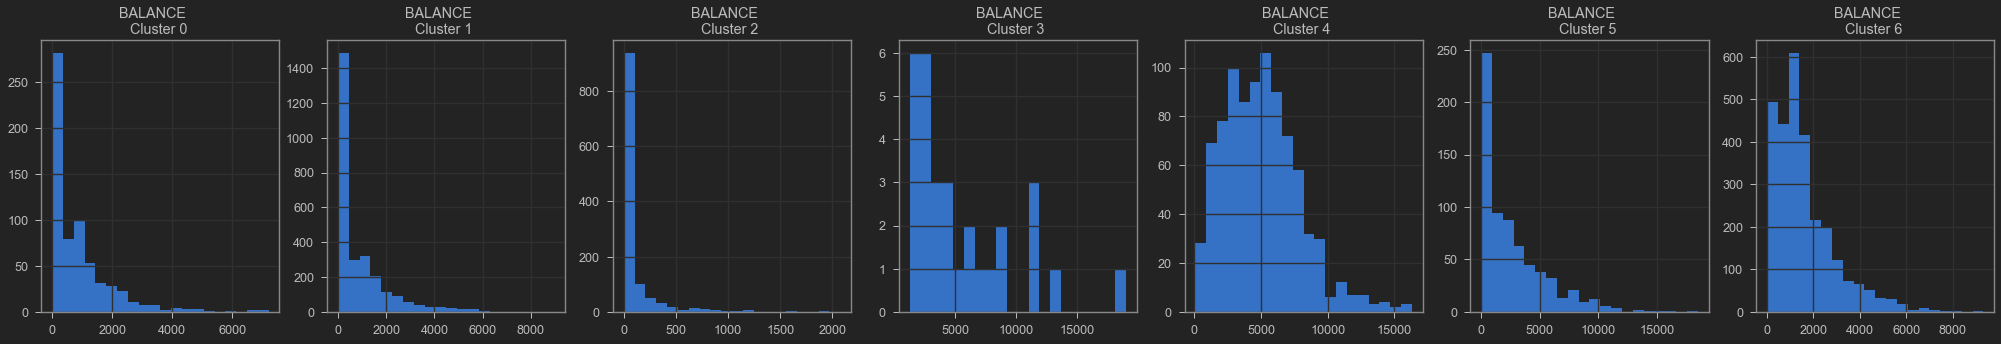

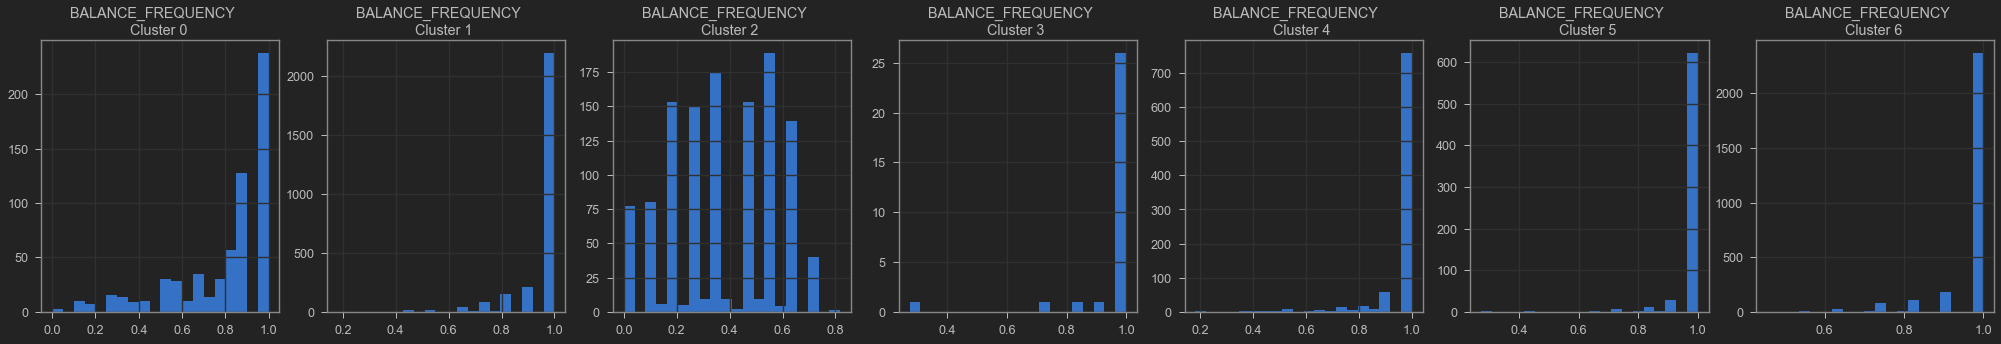

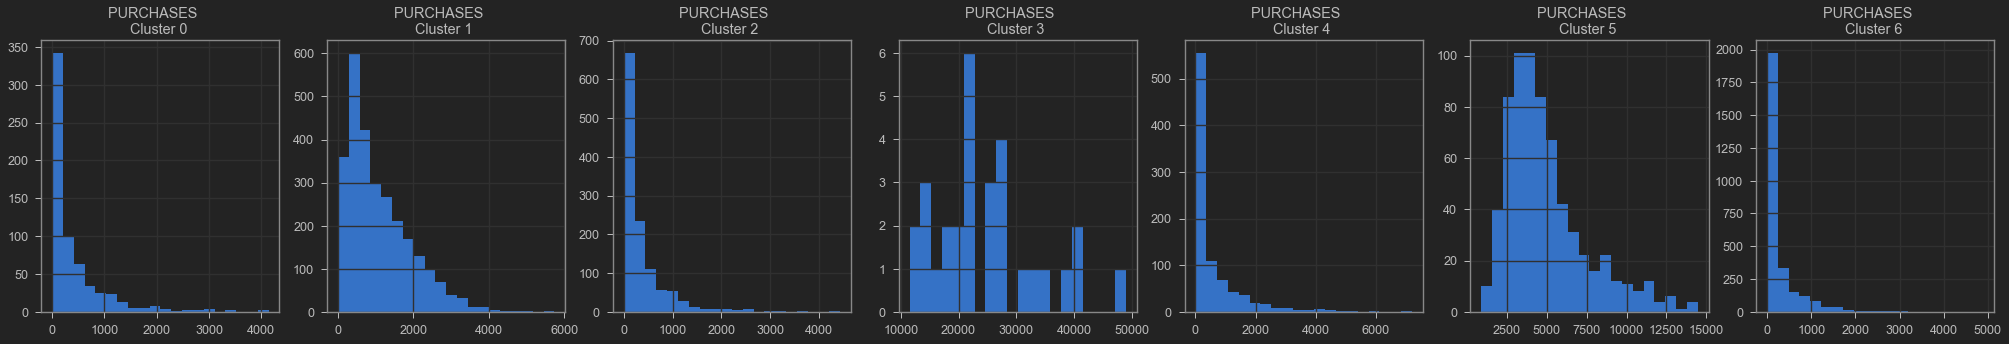

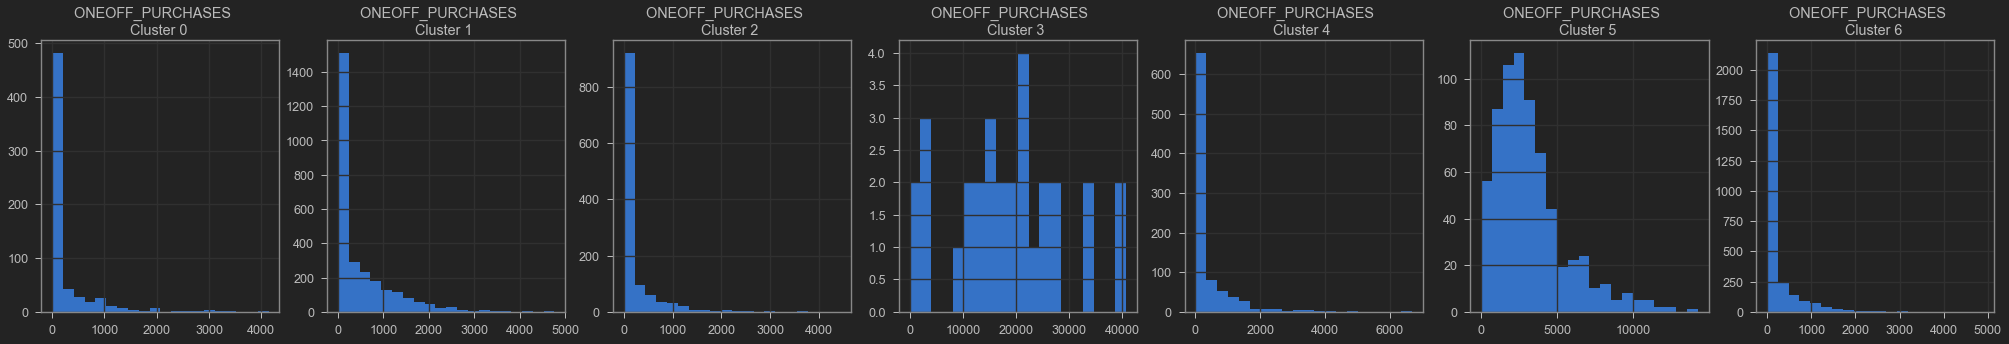

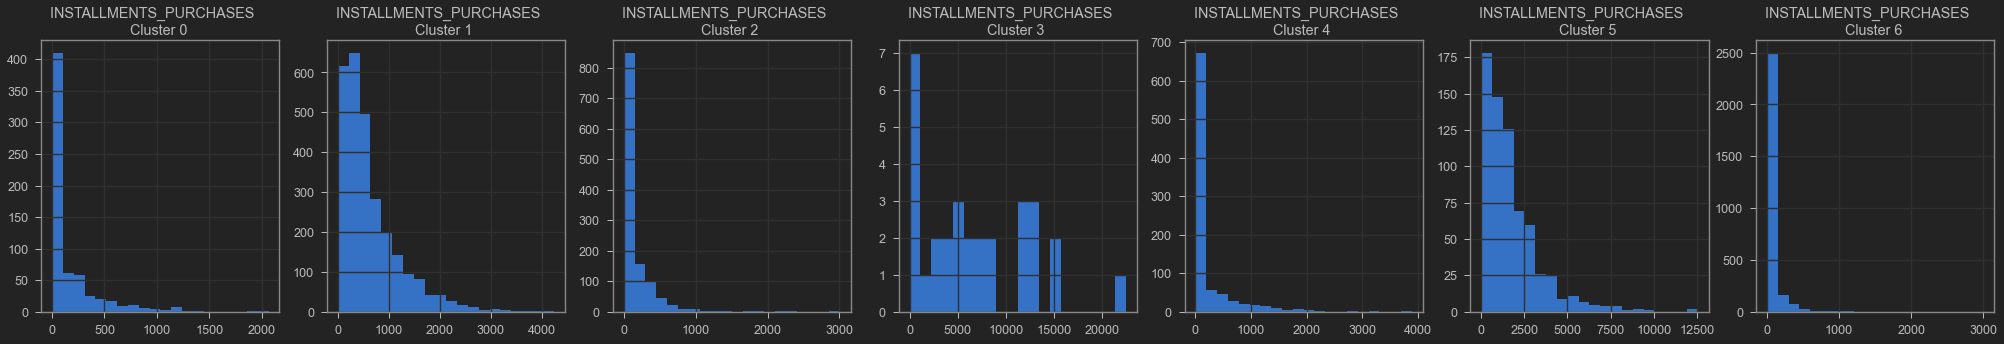

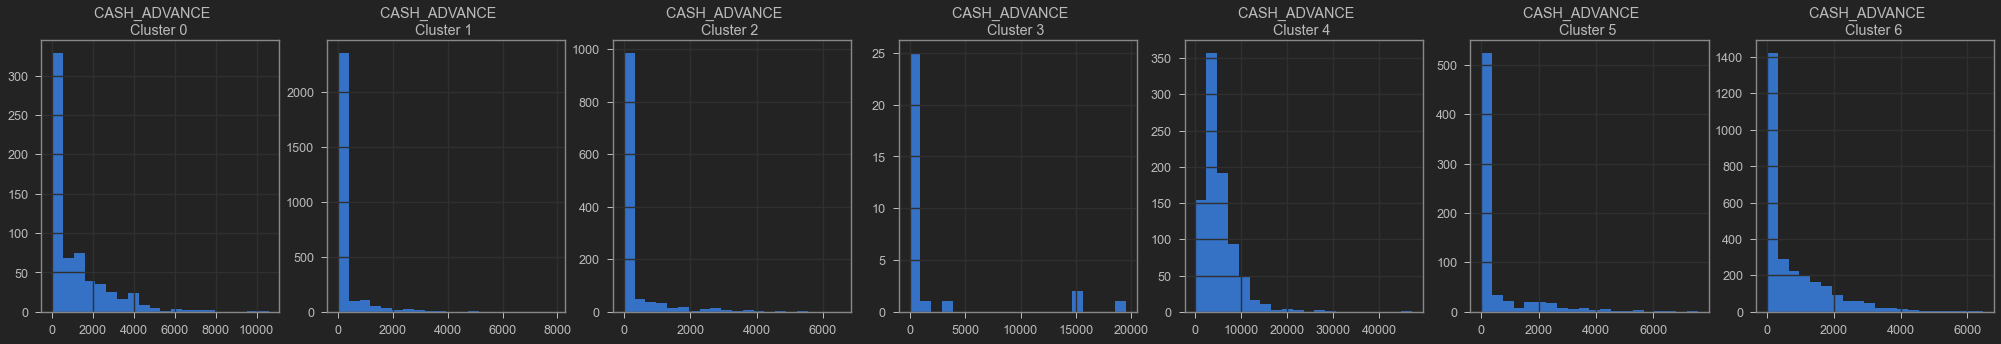

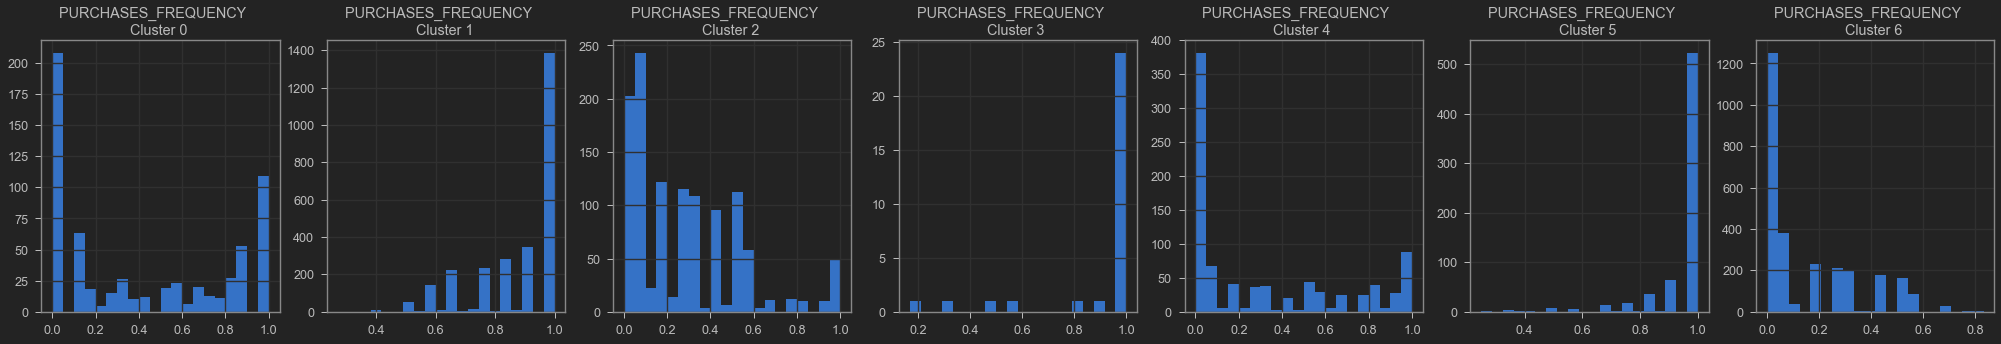

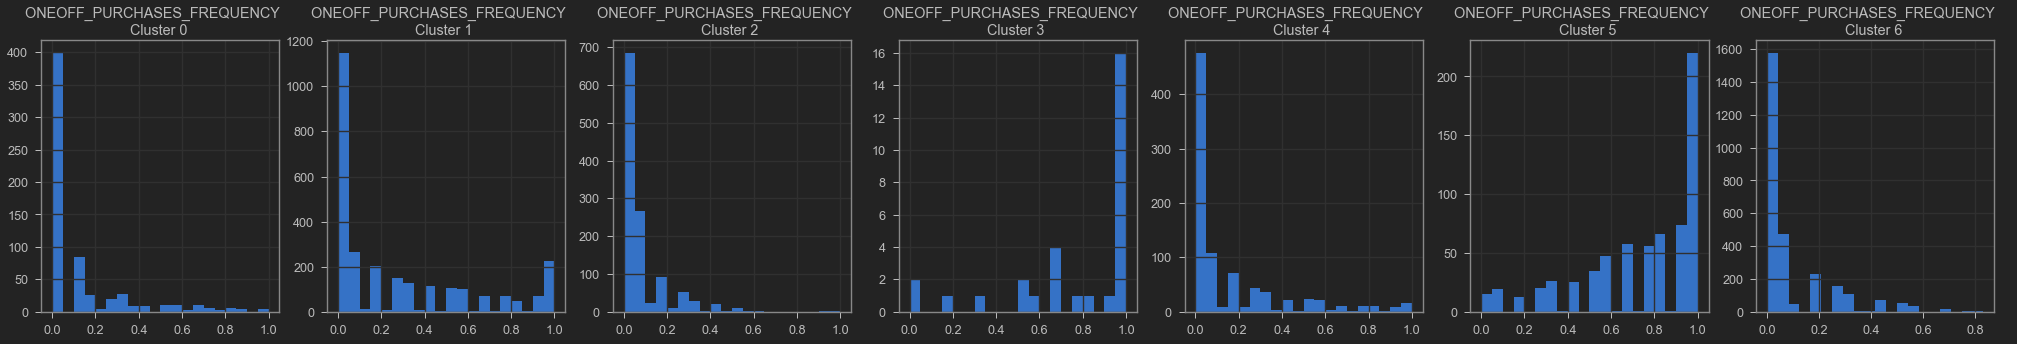

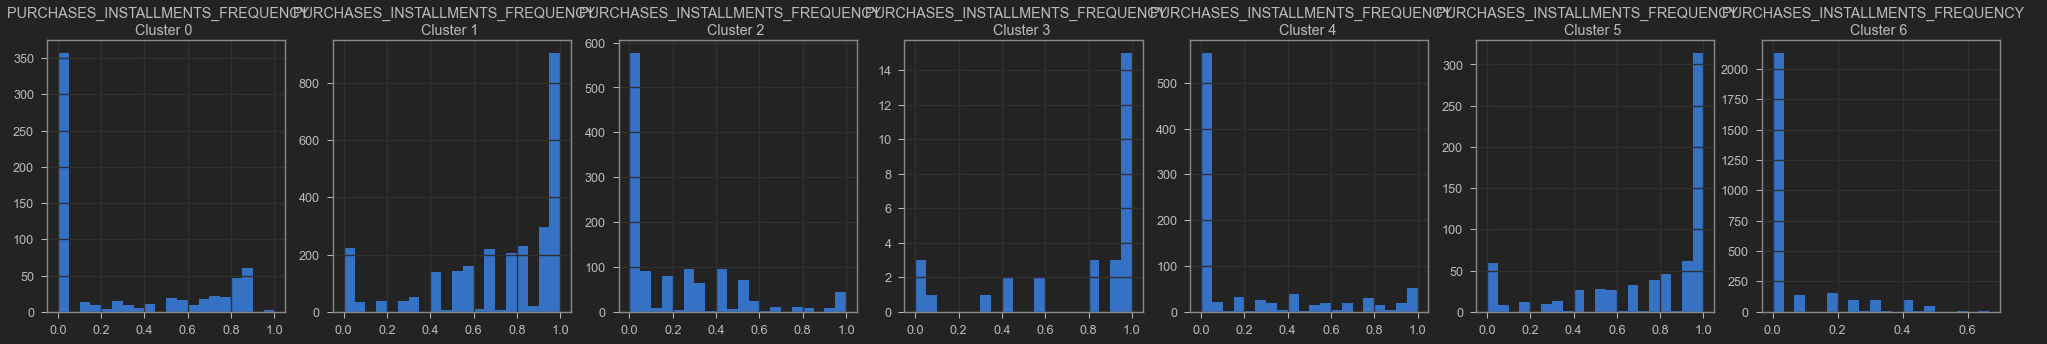

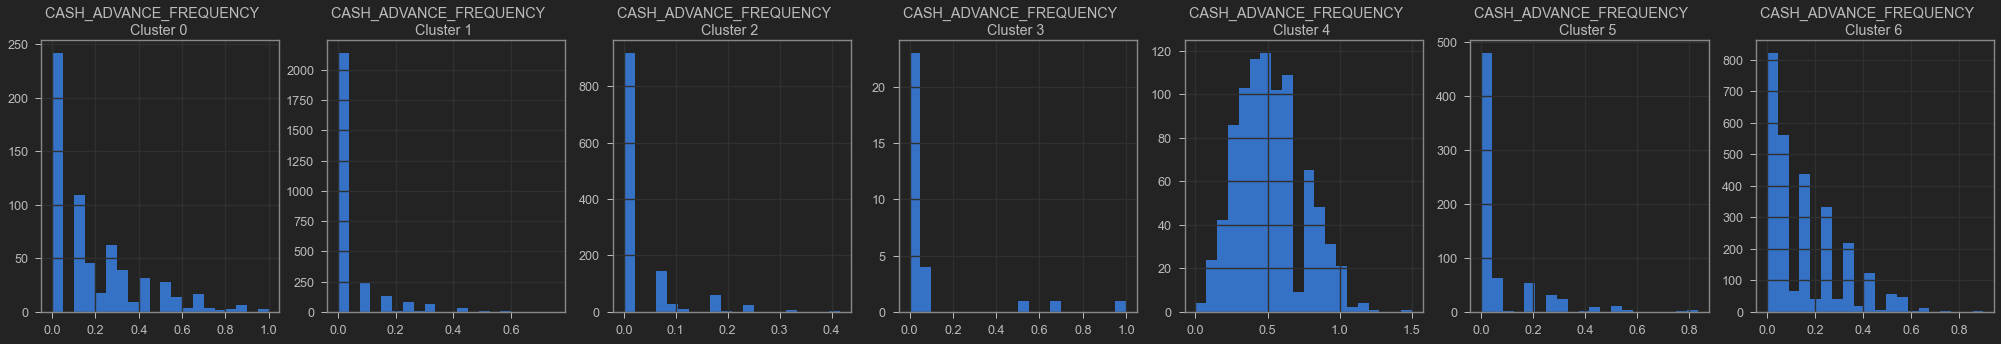

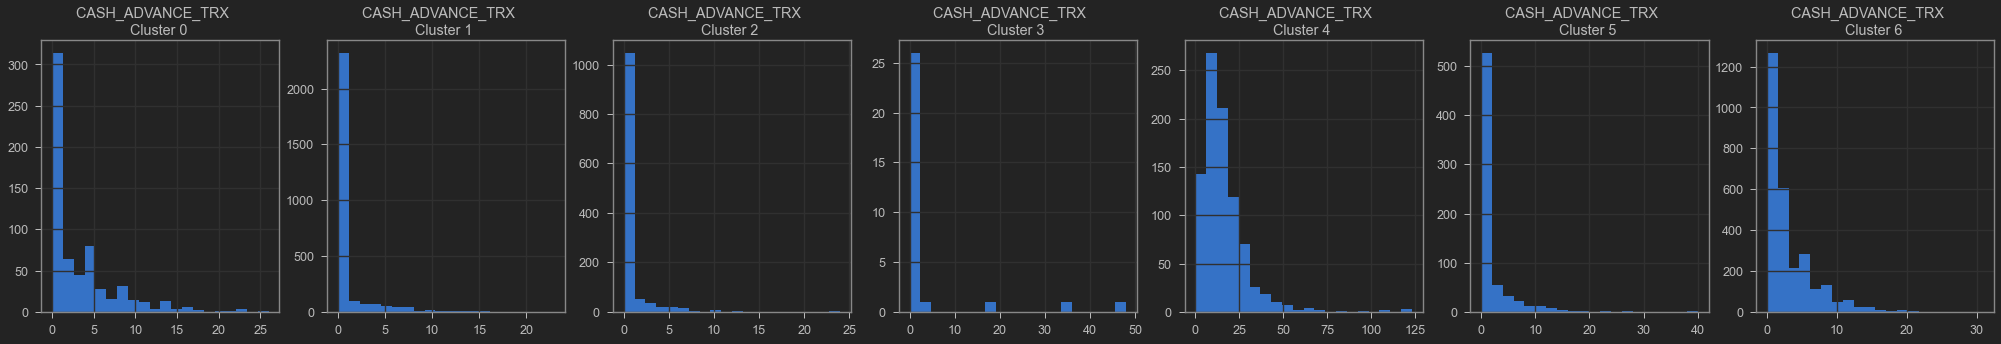

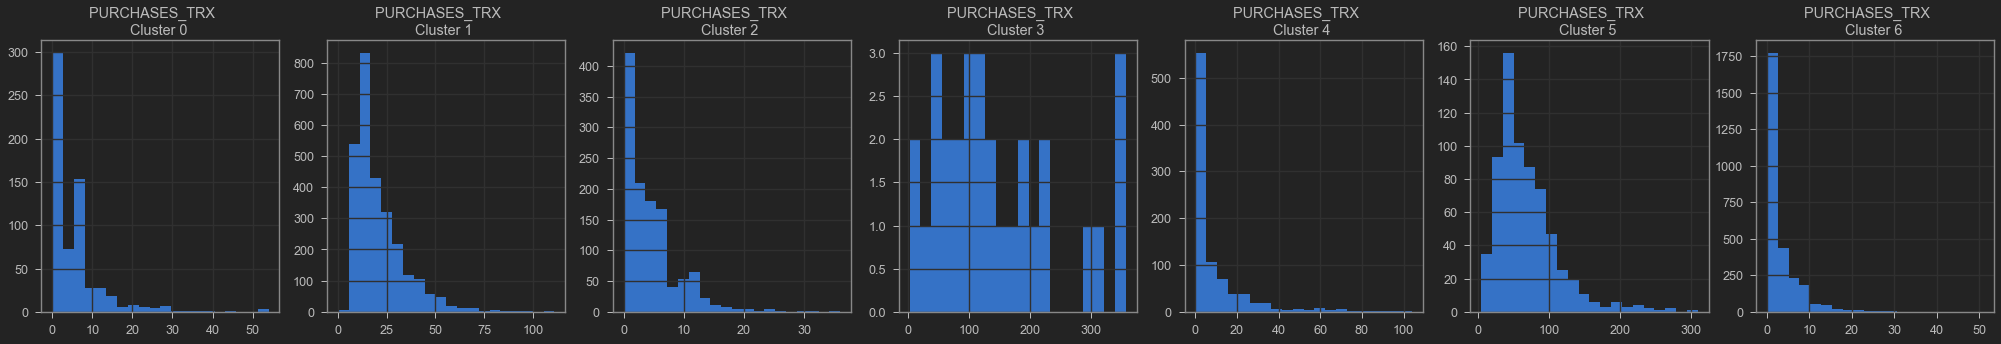

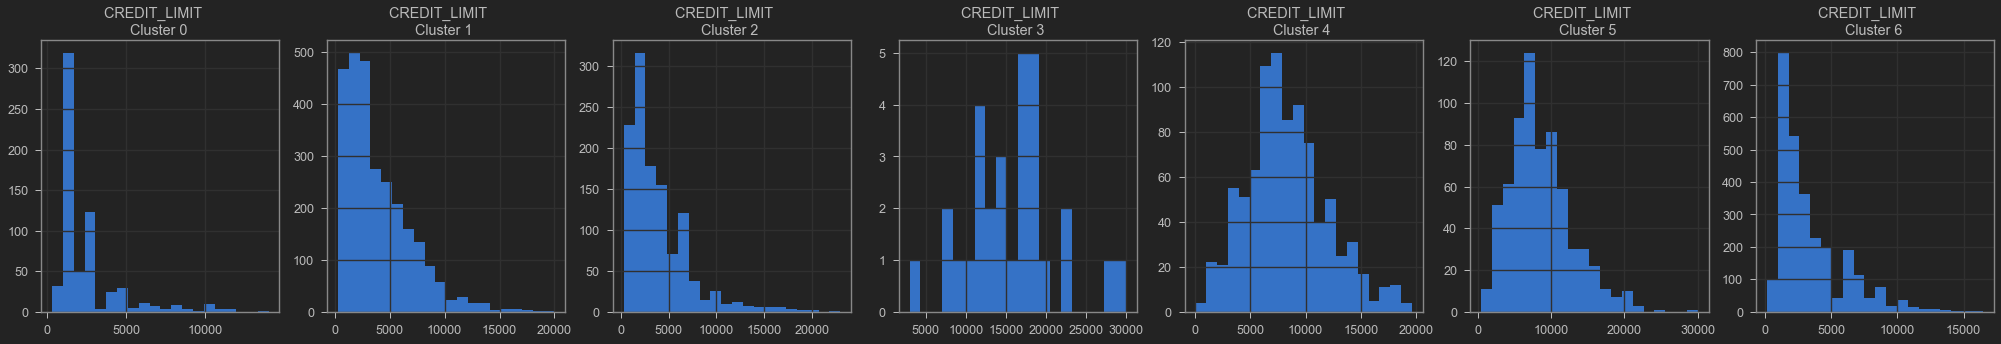

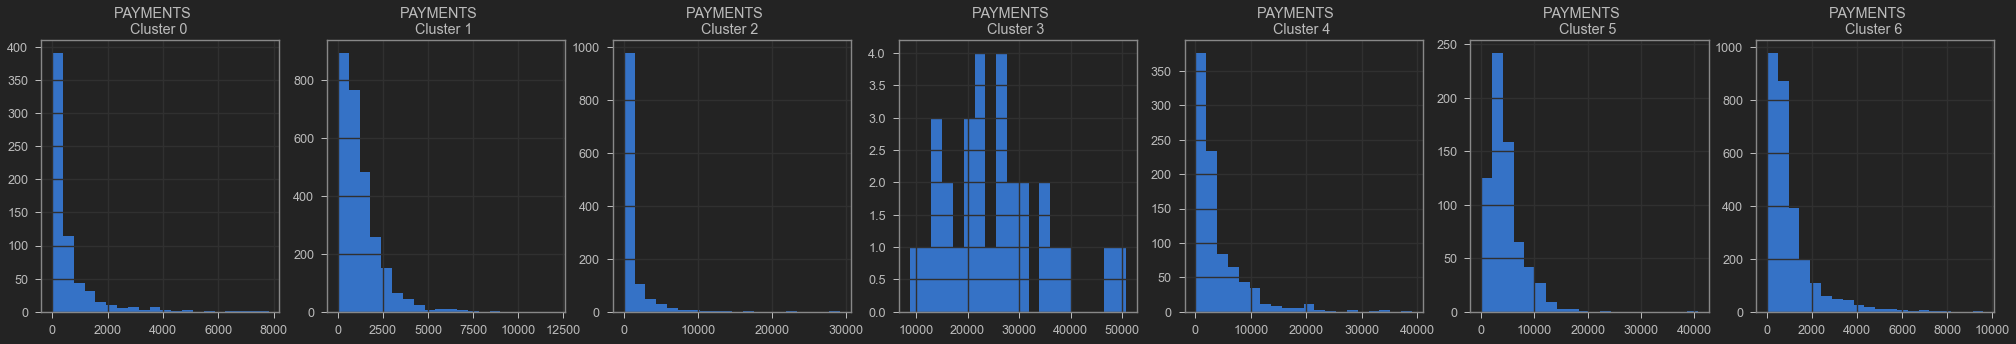

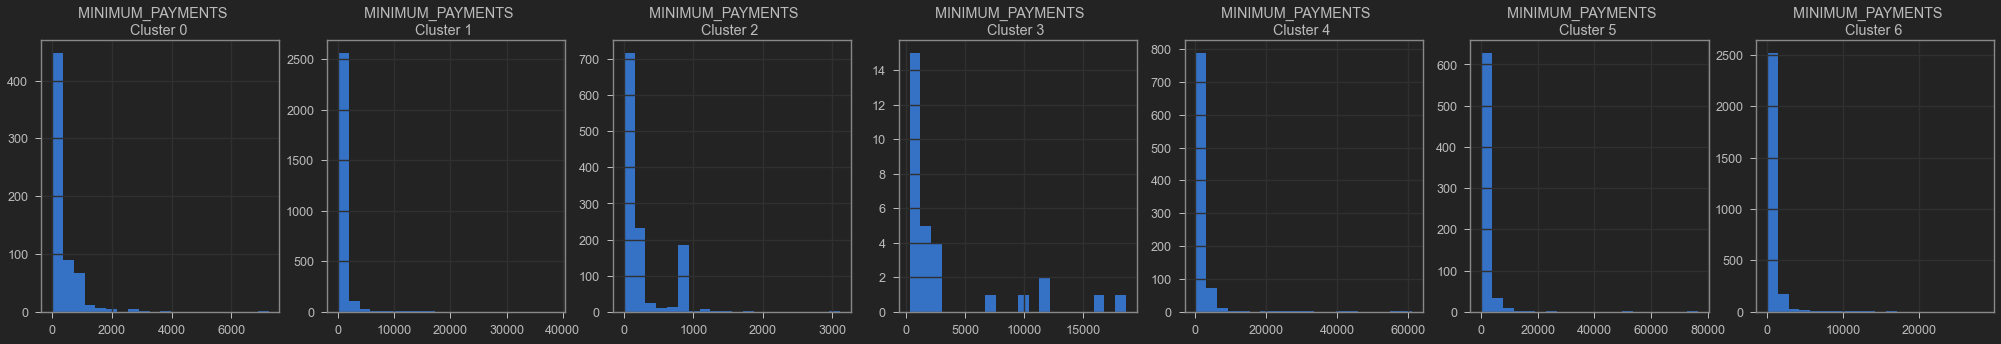

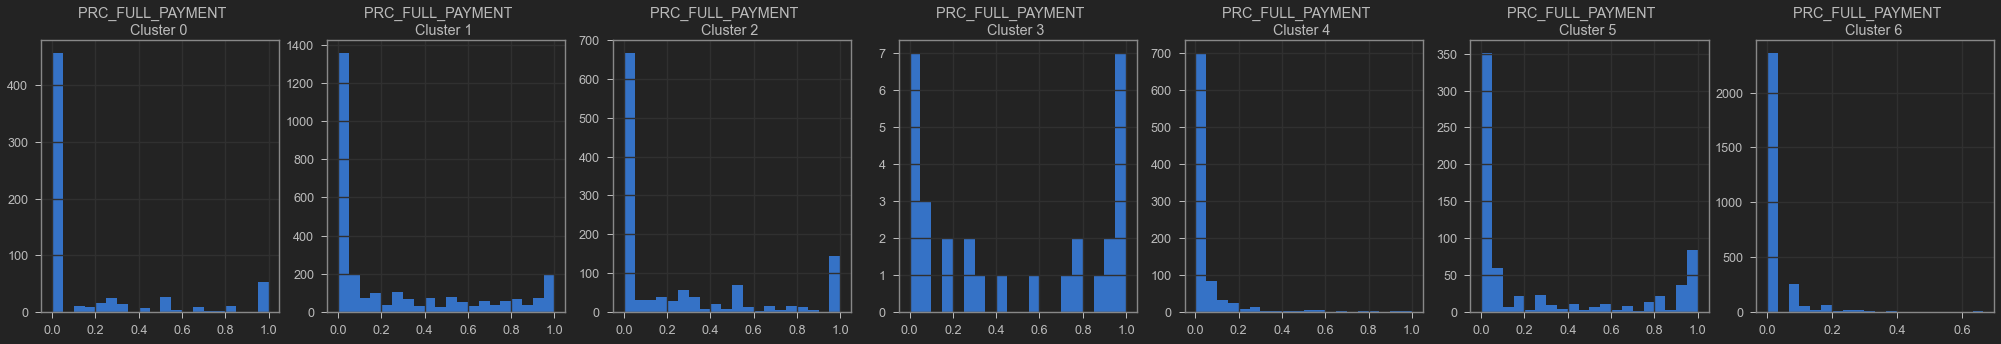

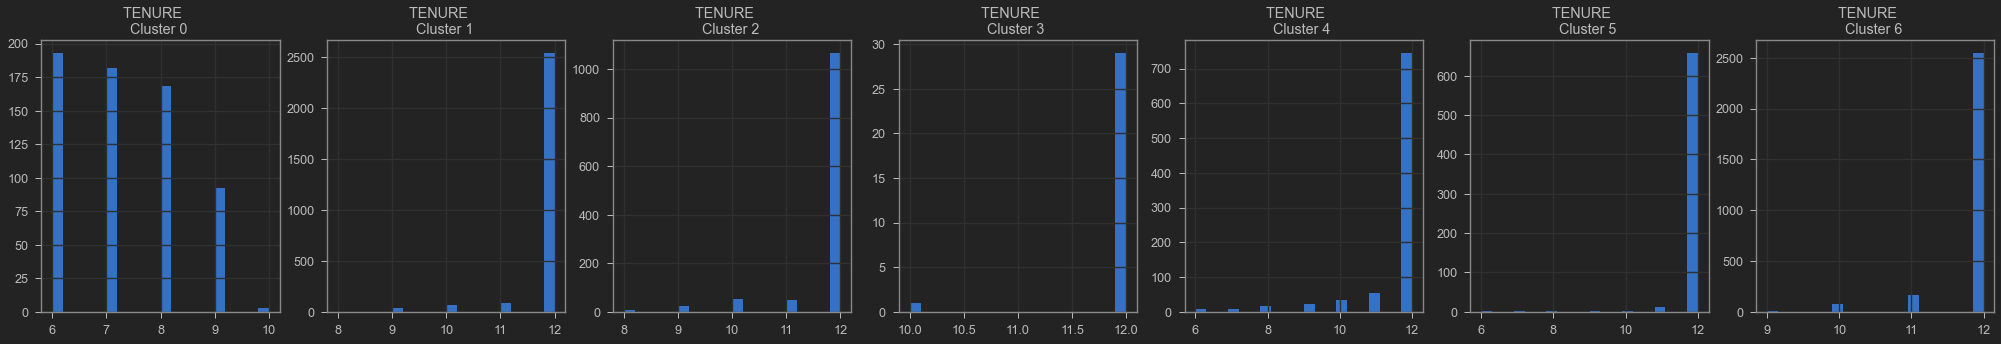

In [39]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



# TASK 8: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

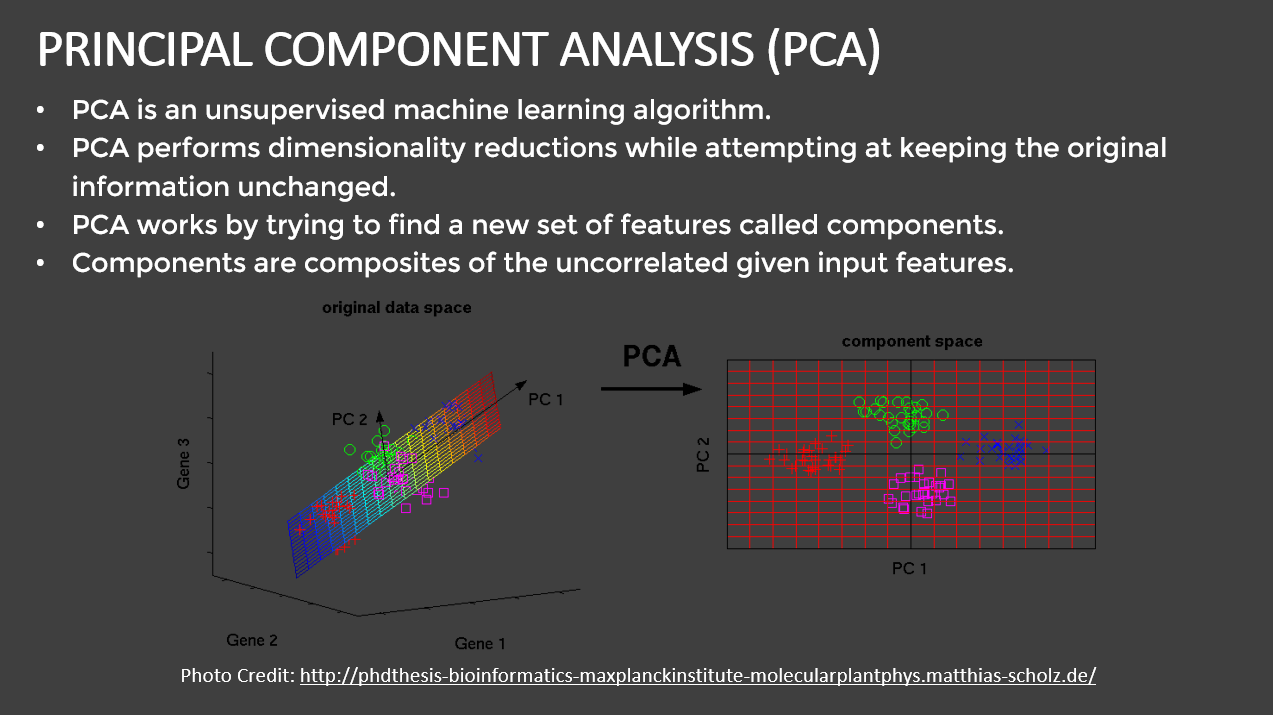

In [40]:
# Obtain the principal components 
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)

In [41]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076444
1,-1.138296,2.506491
2,0.969687,-0.383535
3,-0.873629,0.043178
4,-1.599434,-0.688577


In [42]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076444,6
1,-1.138296,2.506491,4
2,0.969687,-0.383535,1
3,-0.873629,0.043178,6
4,-1.599434,-0.688577,6


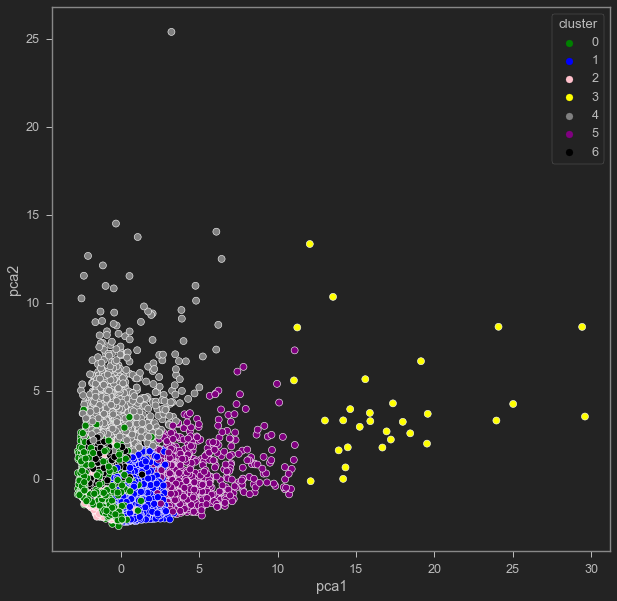

In [43]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['green','blue','pink','yellow','gray','purple', 'black'])
plt.show()